<a href="https://colab.research.google.com/github/pawel0508/CenyEnergiiElektrycznej/blob/main/TGe24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import pandas as pd

In [115]:
df = pd.read_csv('RDN_INDEX_REPORT.csv', sep =';', index_col=0)

### **Dane**
Indeks **TGe24** – średnia arytmetyczna z cen godzinowych danej doby dostawy (od 00:00 do 24:00) określonych w ramach kursu jednolitego o godz. 10:30. Pobrano z TGE. Onejmują zakres od 1 stycznia 2016 roku do 28 października 2020 roku.


In [116]:
tge24_raw = df[df['indeks'] == 'TGe24'].reset_index()
tge24 = tge24_raw

In [117]:
tge24.head()

,data_dostawy,indeks,kurs,wolumen
0,2016-01-02,TGe24,118.78,57856.9
1,2016-01-03,TGe24,122.09,49260.5
2,2016-01-04,TGe24,145.21,47974.1
3,2016-01-05,TGe24,174.88,51109.6
4,2016-01-06,TGe24,152.96,50749.6


In [118]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [119]:
tge24["kurs_lag"] = tge24.kurs.shift(1)
tge24['kurs_diff'] = tge24.kurs - tge24.kurs_lag
tge24 = tge24.iloc[1:, :]

In [120]:
fig = go.Figure()
fig.add_trace(go.Line(x = tge24['data_dostawy'], y = tge24['kurs'],
                      line = dict(color = 'darkred'), name = 'Kurs'))
fig.add_trace(go.Line(x = tge24['data_dostawy'], y = tge24['kurs_diff'],
                      line = dict(color = 'darkblue'), name = 'Kurs diff'))
fig.update_layout(title = 'Indeks TGe24:  Cena energii elektrycznej, rynek dnia natępnego.', 
                  xaxis_title = 'Data', yaxis_title = 'Cena', template = 'simple_white')
fig.show()

/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




**ACF** w poziomach (w cenach).

<Figure size 1440x1440 with 0 Axes>

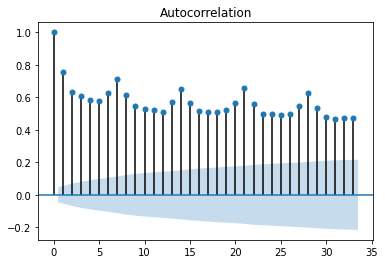

In [125]:

from pandas import read_csv
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
series = tge24['kurs']
plot_acf(series)
plt.show()


**PACF** w poziomach (w cenach).

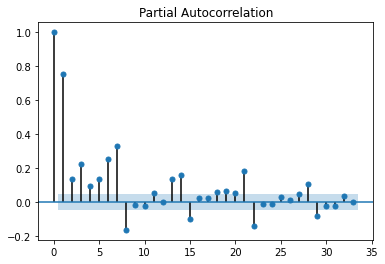

In [122]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
series = tge24['kurs']
plot_pacf(series)
pyplot.show()

**ACF** po zróżnicowaniu (w przyrostach cen).

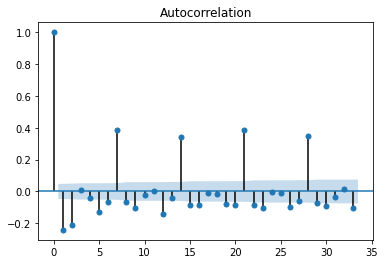

In [123]:
series = tge24['kurs_diff']
plot_acf(series)
pyplot.show()

**PACF** po zróżnicowaniu (w przyrostach cen).



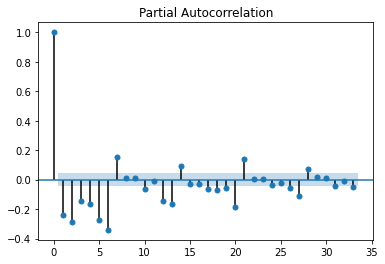

In [124]:
series = tge24['kurs_diff']
plot_pacf(series)
pyplot.show()